# Truncated sphere simulation results: 

We decided to run the simulation we set up from the "$\texttt{_ SETTINGS}$" notebook for $1 \cdot T_{coll} \sim 1.11$. 

As for the previous $\textit{hands-on}$ session, we produced some plots and animations to better understand the result. 


![](3rd_attempt_N100.gif)

Here there are just some code pieces to get the data from the output files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fname = 'collapse_results.out'

In [2]:
data = pd.read_csv(fname).to_numpy()

In [3]:
N = 100
times = data[0::(N+2)].astype(float)

m = {}

for i in range(1, N + 1):
    
    m[f"{i}"]= data[i::(N+2)]  # take only the components every N+1 rows

In [4]:
# split the array (we don't like numbers strings to work with): 

m_data = {}

for j in range(1, N + 1):

    m_data[f"{j}"] = np.array([m[f"{j}"][i][0].split() for i in range(0, len(m[f"{j}"]))]).astype(float)

Just as a reminder of how to easily access the data: 

m1 = {
    
    "m1" : m1_data_1[:, 0],
    "x1" : m1_data_1[:, 1],
    "x2" : m1_data_1[:, 2],
    "x3" : m1_data_1[:, 3],
    "v1" : m1_data_1[:, 4],
    "v2" : m1_data_1[:, 5],
    "v3" : m1_data_1[:, 6]
    
}

In [5]:
times_plot = np.hstack(times)

Finally getting to the actual 3D plot:

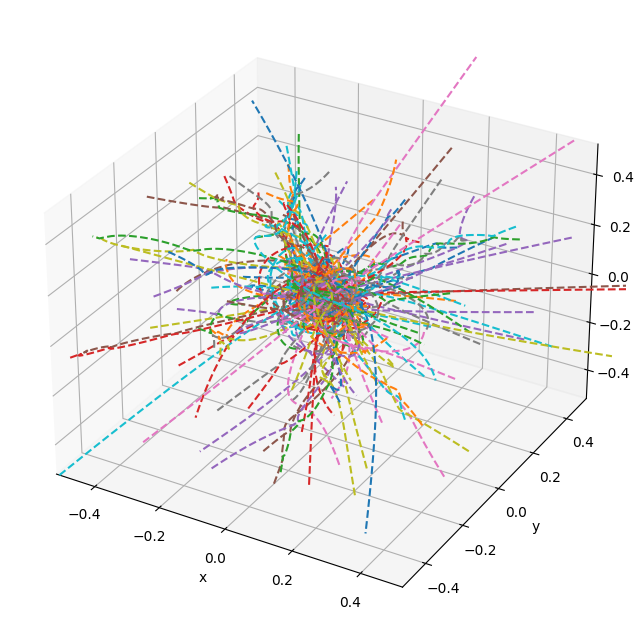

In [6]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8,8))

for i in range(1, N + 1):

    ax.plot(m_data[f"{i}"][:, 1], m_data[f"{i}"][:, 2], m_data[f"{i}"][:, 3], label=f"{i}th particle", linestyle='--')

    
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)

plt.show()

#plt.legend()

Let's see some animation, because this is kind of a mess :). 


In [7]:
import matplotlib.animation as animation

def update(num):
    
    ax.clear() 
    
    for i in range(1, N): 
    
        ax.scatter(m_data[f"{i}"][num, 1], m_data[f"{i}"][num, 2], m_data[f"{i}"][num, 3], s=2.5)             
        
        #ax.scatter(m_data[f"{i}"][num, 1], m_data[f"{i}"][num, 2], m_data[f"{i}"][num, 3], marker='o', size=3.5, c='red')   
    
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')
        ax.set_zlabel(r'$z$')
        
        ax.set_xlim(-0.5, 0.5)
        ax.set_ylim(-0.5, 0.5)
        ax.set_zlim(-0.5, 0.5)

In [8]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


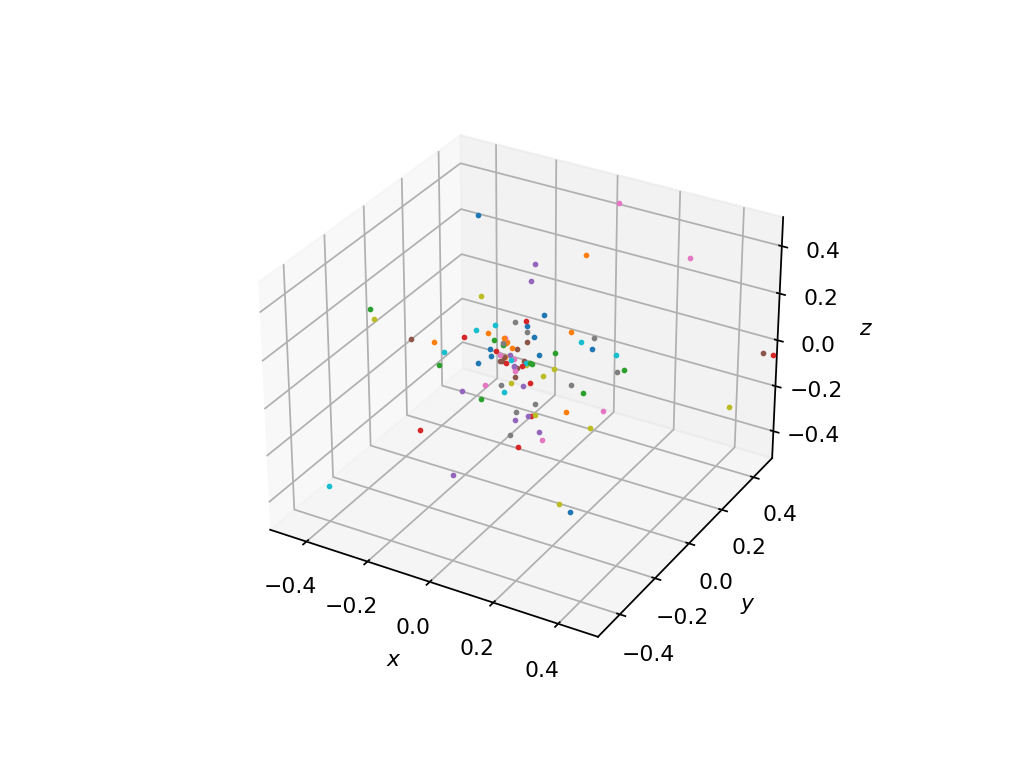

KeyboardInterrupt: 

In [9]:
## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
numDataPoints = len(m_data["100"][:, 3])
line_ani = animation.FuncAnimation(fig, update, interval=10, frames=numDataPoints, blit=True)

# Saving the Animation
f = r"N_100.gif"
writergif = animation.PillowWriter(fps=10)
line_ani.save(f, writer=writergif);


plt.close()

## Comments and observations

The simulation result provides a deep insight on the theory we explained at the beginning. We see that as times passes come of the masses are scattered around and others remain bound. This behaviour was expected because of the random generated points that were not placed at the exact opposites of the sphere, making it difficult to obtain a collapse in the same $R=0$ point. We can eventually check whether it is correct that the trajectories vary the way we see in the 3D plot. 

## $R$ analysis

Goal: see how the distances oh the masses change over time. Check with the results of the dynamical and free-fall time. 

In [10]:
r_t = {}  # set an array where to store rays at different ts

for i in range(1, N + 1):  
    
    r_t[f"{i}"] = np.sqrt(m_data[f"{i}"][:, 1]**2 + m_data[f"{i}"][:, 2]**2 + m_data[f"{i}"][:, 3]**2)

Let's see how different masses behave depending on their initial $\textit{relative}$ position:

<IPython.core.display.Javascript object>


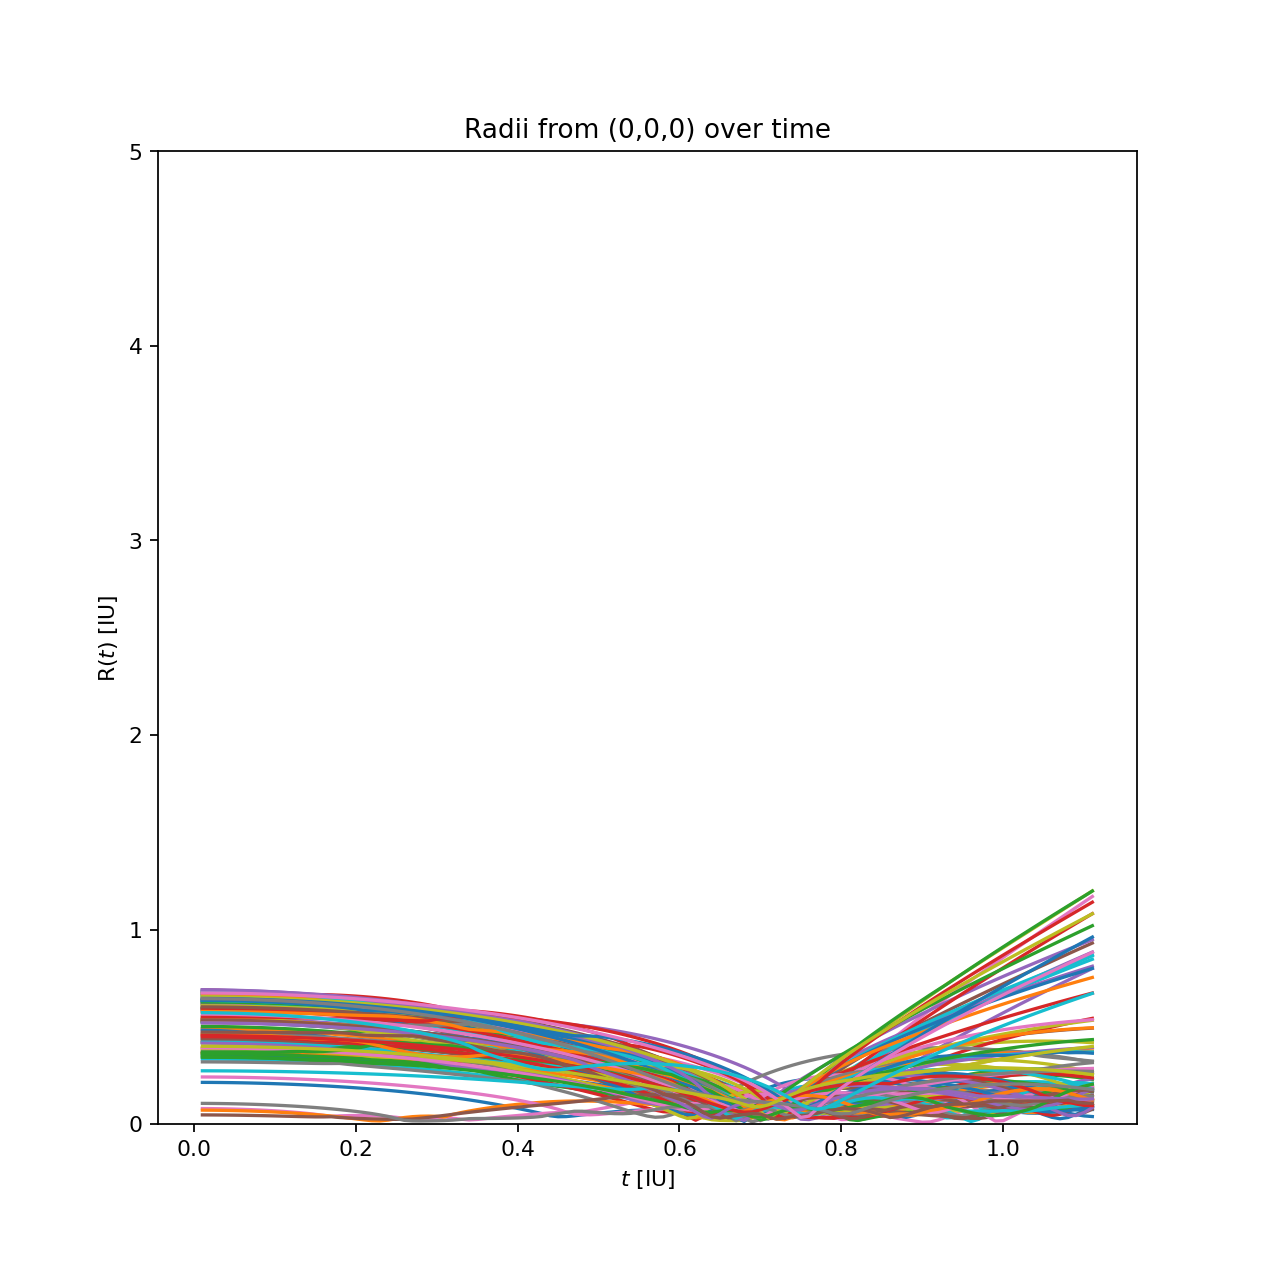

In [11]:
plt.figure(figsize = (8,8))

for i in range(1, N + 1):

    plt.plot(times_plot, r_t[f"{i}"][:], label = f"{i} mass")

plt.xlabel("$t$ [IU]")
plt.ylabel("$\mathrm{R}(t)$ [IU]")
plt.title("Radii from (0,0,0) over time")
plt.ylim(0, 5)
plt.show()

In [12]:
#import numpy.ma as ma

In [13]:
#print("T(r_min) of 67th mass: ", times_plot[np.where(r_t[f"67"] == np.min(r_t[f"67"][ma.masked_inside(times_plot, 0.6, 0.8).mask]))], "s")
#print("T(r_min) of 45th mass: ", times_plot[np.where(r_t[f"45"] == np.min(r_t[f"45"][ma.masked_inside(times_plot, 0.6, 0.8).mask]))], "s")

## $R_{min}$ analysis

We want to see if the $T_{coll}$ we indicated in the previous notebook is relatable to what we observe in the simulation or not. To do so we first take the sum of the $r$ values, and then we evaluate its minimum. The time $t_{min}$ will be out estimation of the "$\textit{average}$" collapse time found for the masses (e.g. when the majority of masses reaches $R \sim 0$. 

In [14]:
def GetSumRs(): 
    
    for i in range(0, len(times_plot)): 
    
        summation = 0
    
        for j in range(1, N):
        
            summation += r_t[f"{j}"][i]
    
        sum_Rs.append(summation)
        
    return np.array(sum_Rs)

In [15]:
sum_Rs = []
sum_Rs = GetSumRs()

<IPython.core.display.Javascript object>


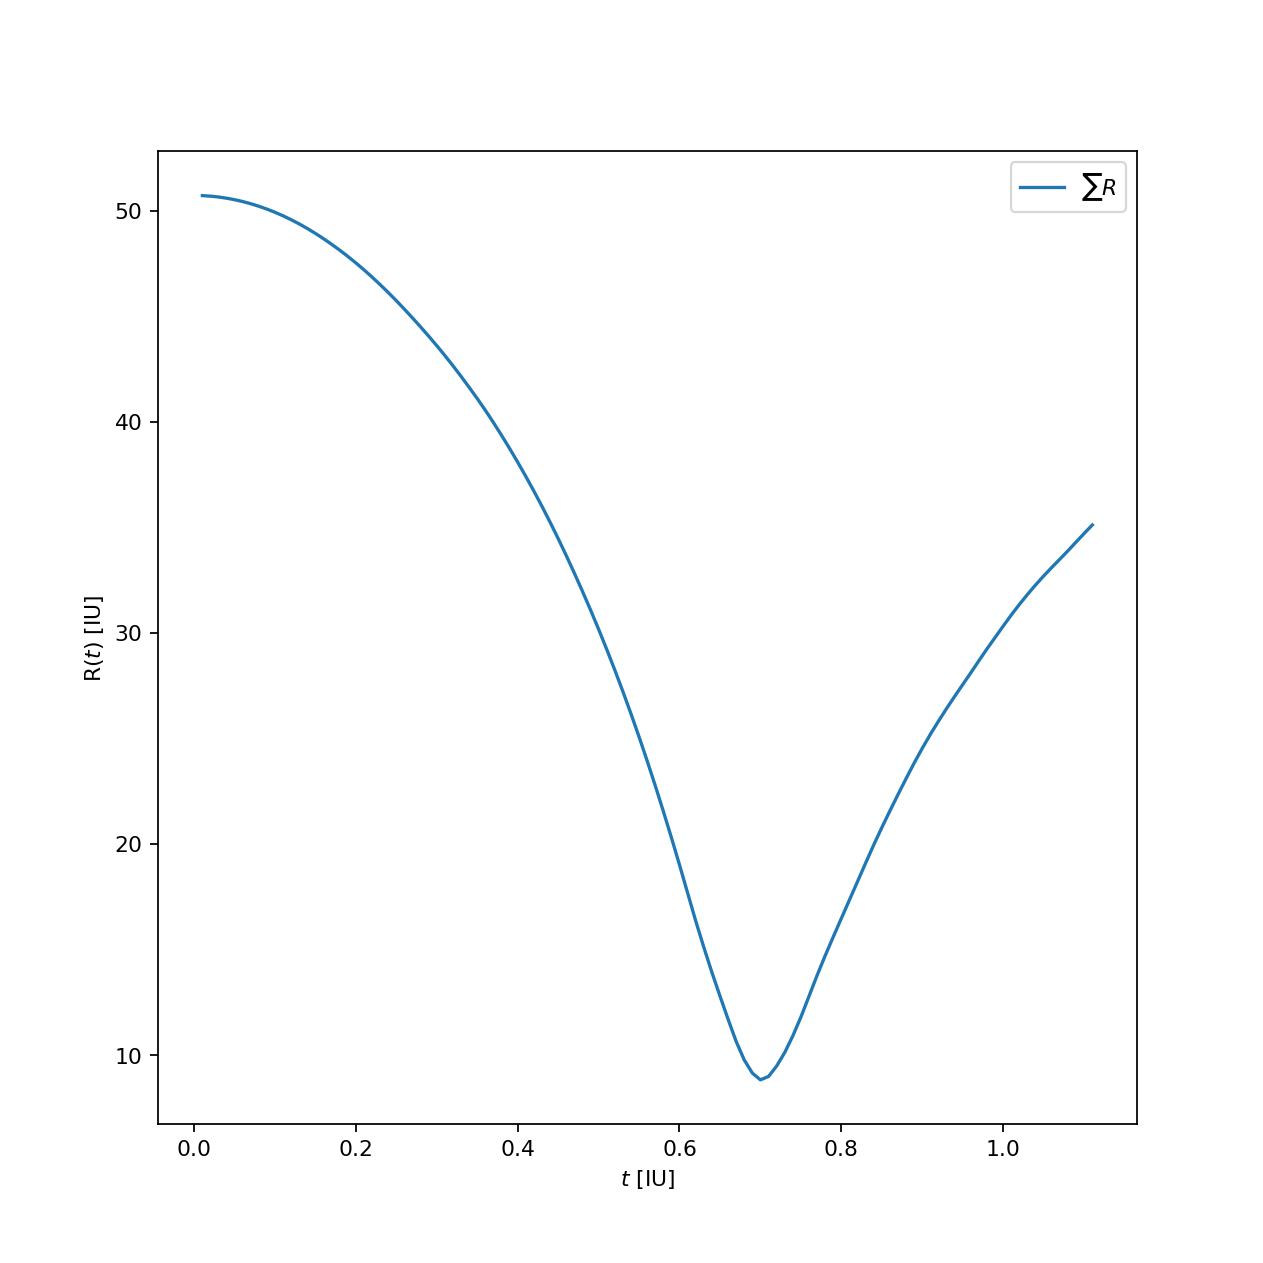

In [16]:
plt.figure(figsize = (8,8))

plt.plot(times_plot, sum_Rs, label = "$\sum R$")

plt.xlabel("$t$ [IU]")
plt.ylabel("$\mathrm{R}(t)$ [IU]")
plt.legend()
plt.show()

Now let's check the minimum: 

In [17]:
print("sum_R_min: ", sum_Rs.min())
print("t_min: ", times_plot[sum_Rs.argmin()])

sum_R_min:  8.839539766741488
t_min:  0.7000025995484124


For the sake of completeness I here report the value of the $T_{coll}$ we analitically estimated n the other notebook: 

In [18]:
T_coll = 1.1107207345395915
print("T_coll: ", T_coll)

T_coll:  1.1107207345395915


The $\textbf{relative}$ error is roughly estimated as: 

In [19]:
err = np.abs(times_plot[sum_Rs.argmin()] - T_coll) / T_coll
print("rel_err: ", err)

rel_err:  0.36977623827417544
